In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from format_param import prettify_param
from matplotlib import rc
sns.set(font_scale=1.5)
sns.set_style("white")

In [2]:
prefix = "HH_object_ATTP_"
filename = "filtered_logs/object_id_attp_filtered_combined.txt"
s = open(filename, "r").readlines()    

In [3]:
raw_pr = []
raw_mem = []
raw_time = []
raw_final_mem = []
ln = 0
query_type = ""
flagFinal = False
for line in s:
    if line.startswith("START_OF_FINAL_STATS_REPORT"):
        flagFinal = True
    if line.startswith("Stats request at line"):
        ln = int(re.findall("\d+", line)[1])
        flagFinal = False
    if line.find(" timers") != -1:
        query_type = line.strip().split(" ")[0]
    if line.find(" ms = ") != -1 and flagFinal:
        t = line.strip().split(':')
        if t[0] != "EXACT_HH":
            sketch = t[0].split('-')
            sketch = [sketch[0], ''.join(sketch[1:])]
            raw_time.append(sketch + [ln, query_type, int(t[1].split("=")[1].strip()[:-3])])
    if line.find("prec") != -1:
        t = line.strip().split(':')
        if t[0] != "EXACT_HH":
            sketch = t[0].split('-')
            sketch = [sketch[0], ''.join(sketch[1:])]
            pr_info = t[1].split(",")
            try:
                pr_info = list(map(lambda x: float(x.split('=')[2].strip()), pr_info))
            except ZeroDivisionError:
                continue
            raw_pr.append(sketch + [pr_info[0], pr_info[1]])
    if line.find("MB") != -1:
        t = line.strip().split(':')
        if t[0] != "EXACT_HH":
            sketch = t[0].split('-')
            t = [sketch[0], ''.join(sketch[1:]), ln, int(t[1].split("=")[0].strip()[:-2])]
            if flagFinal:
                raw_final_mem.append(t)
            else:
                raw_mem.append(t)

In [4]:
mem = pd.DataFrame(raw_mem, columns = ["Sketch", "Param", "Stream Size", "Memory Usage (B)"])
mem

,Sketch,Param,Stream Size,Memory Usage (B)
0,SAMPLING,ss500000,13528041,128005024
1,PCM_HH,logU17e0.01d0.01D2000,13528041,7004928
2,CMG,e0.010000,13528041,319752
3,SAMPLING,ss500000,27056082,128005024
4,PCM_HH,logU17e0.01d0.01D2000,27056082,10833344
5,CMG,e0.010000,27056082,372296
6,SAMPLING,ss500000,40584123,128006304
7,PCM_HH,logU17e0.01d0.01D2000,40584123,13104096
8,CMG,e0.010000,40584123,399256
9,SAMPLING,ss500000,54112164,128009120


In [5]:
final_mem = pd.DataFrame(raw_final_mem, columns = ["Sketch", "Param", "Stream Size", "Memory Usage (B)"])
final_mem

,Sketch,Param,Stream Size,Memory Usage (B)
0,SAMPLING,ss500000,1352804100,128909984
1,PCM_HH,logU17e0.01d0.01D2000,1352804100,149789696
2,CMG,e0.010000,1352804100,556880
3,SAMPLING,ss250000,1352804100,64974752
4,PCM_HH,logU17e0.02d0.01D2000,1352804100,137971072
5,CMG,e0.008000,1352804100,721208
6,SAMPLING,ss100000,1352804100,26459552
7,PCM_HH,logU17e0.007d0.01D2000,1352804100,162631676
8,CMG,e0.006000,1352804100,855312
9,SAMPLING,ss50000,1352804100,13551520


In [6]:
time = pd.DataFrame(raw_time, columns = ["Sketch", "Param", "Stream Size", "Type", "Time (ms)"])
time_processed = pd.merge(time, final_mem, on = ["Sketch", "Param", "Stream Size"]).drop(["Stream Size", "Param"], 1).drop_duplicates()
utime = time_processed[time_processed["Type"] == "Update"]
qtime = time_processed[time_processed["Type"] == "Query"]
utime

,Sketch,Type,Time (ms),Memory Usage (B)
0,SAMPLING,Update,112326,128909984
2,PCM_HH,Update,4588522,149789696
4,CMG,Update,455421,556880
6,SAMPLING,Update,112632,64974752
8,PCM_HH,Update,4460574,137971072
10,CMG,Update,415344,721208
12,SAMPLING,Update,115763,26459552
14,PCM_HH,Update,4592836,162631676
16,CMG,Update,401105,855312
18,SAMPLING,Update,114692,13551520


In [7]:
pr = pd.DataFrame(raw_pr, columns = ["Sketch", "Param", "Precision", "Recall"])
pr = pd.merge(pr, final_mem, on = ["Sketch", "Param"]).groupby(["Sketch", "Param", "Memory Usage (B)"]).mean().drop("Stream Size", 1)
pr = pd.DataFrame(pr.to_records())
pr

,Sketch,Param,Memory Usage (B),Precision,Recall
0,CMG,e0.001000,4206160,0.900000,1.000000
1,CMG,e0.002000,2220496,0.900000,1.000000
2,CMG,e0.004000,1211832,0.950000,1.000000
3,CMG,e0.006000,855312,0.870000,1.000000
4,CMG,e0.008000,721208,0.760000,1.000000
5,CMG,e0.010000,556880,0.800000,1.000000
6,PCM_HH,logU17e0.001d0.01D2000,201638580,NaN,0.000000
7,PCM_HH,logU17e0.003d0.01D2000,174333316,NaN,0.000000
8,PCM_HH,logU17e0.007d0.01D2000,162631676,NaN,0.000000
9,PCM_HH,logU17e0.01d0.01D2000,149789696,0.000000,0.000000


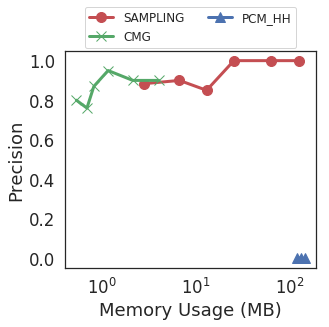

In [8]:
fig, ax = plt.subplots(figsize = (4.5, 4))
sketch_type = ["SAMPLING", "CMG", "PCM_HH"]

        
linestyles = ["-", "--", "."]
colors = ["r", "g", "b"]
markers = ["o", "x", "^"]
ms = 10
lw = 3

cnt = 0
for sk in sketch_type:
    dat = pr[pr["Sketch"] == sk].sort_values(by = "Memory Usage (B)").transpose().to_numpy()
    plt.plot(dat[2] / 1048576.0, dat[3], color = colors[cnt], marker = markers[cnt], label = sk, markersize = ms, linewidth = lw)
    cnt += 1
lgd = ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.23), ncol=2, fontsize=12)
ax.set_xscale("log")
ax.set_xlabel("Memory Usage (MB)")
ax.set_ylabel("Precision")
#plt.tight_layout()
plt.savefig(prefix + 'precision.pdf', bbox_extra_artists=[lgd], bbox_inches='tight')

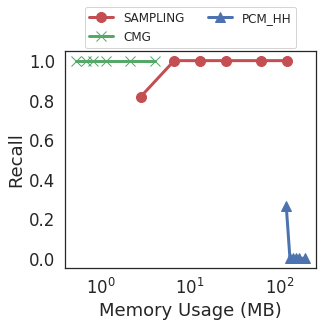

In [9]:
fig, ax = plt.subplots(figsize = (4.5, 4))
cnt = 0
for sk in sketch_type:
    dat = pr[pr["Sketch"] == sk].sort_values(by = "Memory Usage (B)").transpose().to_numpy()
    plt.plot(dat[2] / 1048576.0, dat[4], color = colors[cnt], marker = markers[cnt], label = sk, markersize = ms, linewidth = lw)
    cnt += 1
    
lgd = ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.23), ncol=2, fontsize=12)
ax.set_xscale("log")
ax.set_xlabel("Memory Usage (MB)")
ax.set_ylabel("Recall")
#plt.tight_layout()
plt.savefig(prefix + 'recall.pdf', bbox_extra_artists=[lgd], bbox_inches='tight')

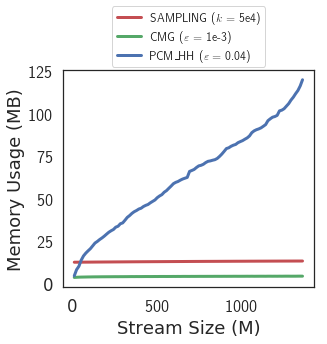

In [13]:
fig, ax = plt.subplots(figsize = (4.5, 4))
cnt = 0
sketch_param = {
    "PCM_HH" : ["logU17e0.04d0.01D2000"],
    "SAMPLING" : ["ss50000"],
    "CMG" : ["e0.001000"],
}

rc('text', usetex=True)
for sk in sketch_type:
    cnt0 = 0
    for p in sketch_param[sk]:
        dat = mem[(mem["Sketch"] == sk) & (mem["Param"] == p)].sort_values(by = "Stream Size").transpose().to_numpy()
        plt.plot(dat[2] / 1000000.0, dat[3] / 1048576.0, label = "%s %s" % (sk.replace('_', '\\_'), prettify_param(p)), markersize = ms, color = colors[cnt], linestyle = linestyles[cnt0], linewidth = lw)
        cnt0 += 1
    cnt += 1

lgd = ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.32), ncol=1, fontsize=12)

#ax.set_yscale("log")
ax.set_xlabel("Stream Size (M)")
ax.set_ylabel("Memory Usage (MB)")
#plt.tight_layout()
plt.savefig(prefix + 'mem.pdf', bbox_extra_artists=[lgd], bbox_inches='tight')
rc('text', usetex=False)

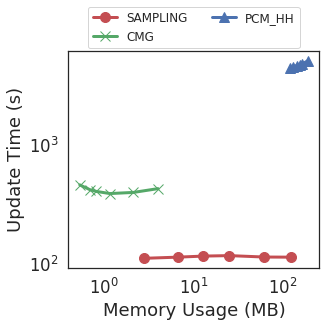

In [11]:
fig, ax = plt.subplots(figsize = (4.5, 4))
cnt = 0

for sk in sketch_type:
    dat = utime[utime["Sketch"] == sk].sort_values(by = "Memory Usage (B)").transpose().to_numpy()
    plt.plot(dat[-1] / 1048576.0, dat[-2]/1000.0, color = colors[cnt], marker = markers[cnt], label = sk, markersize = ms, linewidth = lw)
    cnt += 1

lgd = ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.23), ncol=2, fontsize=12)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Memory Usage (MB)")
ax.set_ylabel("Update Time (s)")
#plt.tight_layout()
plt.savefig(prefix + 'utime.pdf', bbox_extra_artists=[lgd], bbox_inches='tight')

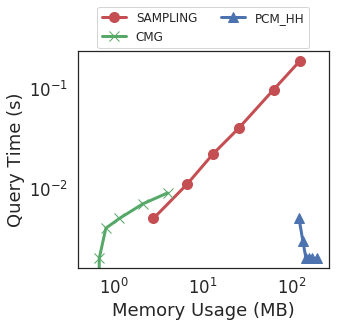

In [12]:
fig, ax = plt.subplots(figsize = (4.5, 4))
cnt = 0
for sk in sketch_type:
    dat = qtime[qtime["Sketch"] == sk].sort_values(by = "Memory Usage (B)").transpose().to_numpy()
    plt.plot(dat[-1] / 1048576.0, dat[-2]/1000.0, color = colors[cnt], marker = markers[cnt], label = sk, markersize = ms, linewidth = lw)
    cnt += 1

lgd = ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.23), ncol=2, fontsize=12)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Memory Usage (MB)")
ax.set_ylabel("Query Time (s)")
#plt.tight_layout()
plt.savefig(prefix + 'qtime.pdf', bbox_extra_artists=[lgd], bbox_inches='tight')